<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/hccho2/DL-UPMTP/blob/master/DL-TF-TORCH-CH1-Basic.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
import tensorflow as tf
import torch
import numpy as np
import librosa
import torchaudio

print(f'tensorflow: {tf.__version__}')
print(f'torch: {torch.__version__}')
print(f'numpy: {np.__version__}')
print(f'librosa: {librosa.__version__}')
print(f'torchaudio: {torchaudio.__version__}')

tensorflow: 2.13.0
torch: 2.0.1+cu118
numpy: 1.23.5
librosa: 0.10.1
torchaudio: 2.0.2+cu118


# 1.1 Numpy Array

In [ ]:
import numpy as np

In [ ]:
x = np.random.randn(2,3)
y = np.zeros_like(x)
z = np.ones_like(x)
print(f'x: {x}\n\ny: {y}\n\nz: {z}')

x: [[ 1.72574131 -0.04310181  0.07090093]
 [ 0.27845374  0.83066721 -0.92458249]]

y: [[0. 0. 0.]
 [0. 0. 0.]]

z: [[1. 1. 1.]
 [1. 1. 1.]]


## 1.1.2 np.printoptions
- suppress=True이면 부동 소수점 형식으로 출력한다

In [ ]:
X = np.random.randn(3,4)*0.0001
print('scientific notation:')
print(X)
with np.printoptions(precision=6, suppress=True):
    print('6 decimal point:')
    print(X)

scientific notation:
[[ 2.08946728e-05  4.68413860e-05  3.67476524e-05 -1.14428545e-04]
 [-6.80781585e-05 -1.29094780e-04 -1.18639217e-04  8.20218896e-05]
 [ 1.47101035e-05  1.15003281e-04 -2.40582507e-05  1.63284545e-04]]
6 decimal point:
[[ 0.000021  0.000047  0.000037 -0.000114]
 [-0.000068 -0.000129 -0.000119  0.000082]
 [ 0.000015  0.000115 -0.000024  0.000163]]


## 1.1.3 basic indexing & advanced indexing
- basic indexing은 view를 만들기 때문에 원본 데이터를 변화시킬 수 있다.
- advanced indexing은 값을 복사해 온다.

In [ ]:
X = np.array([[0.5267, 0.0362, 0.171,  0.2661],
                [0.0076,  0.0247, 0.8906, 0.0771],
                [0.265,   0.2017, 0.4556, 0.0777],
                [0.0972,  0.4766, 0.3375, 0.0887],
                [0.11,    0.2512, 0.2637, 0.3751]])
X[1:4,1:3]  # basic indexing

array([[0.0247, 0.8906],
       [0.2017, 0.4556],
       [0.4766, 0.3375]])

In [ ]:
X[X>0.5] # advanced indexing

array([0.5267, 0.8906])

In [ ]:
x = np.array([[ -5,   2,  0, -7],
              [ -1,   9,  3,  8],
              [ -3,  -3,  4,  6]])


a = x[::2, 1]  # view
b = x[[0,2],[1,1]]  # copy
a[0] = -99 # x의 값도 변한다.
b[1] = -99 # x와 무관

print(x)

[[ -5 -99   0  -7]
 [ -1   9   3   8]
 [ -3  -3   4   6]]


np.argmax()로 최댓값을 가지는 index 추출

In [ ]:
X = np.array([[0.5267, 0.0362, 0.171,  0.2661],
                [0.0076,  0.0247, 0.8906, 0.0771],
                [0.265,   0.2017, 0.4556, 0.0777],
                [0.0972,  0.4766, 0.3375, 0.0887],
                [0.11,    0.2512, 0.2637, 0.3751]])
X[np.arange(len(X)),X.argmax(axis=-1)]  # 각 행에서 최대값만 추출

array([0.5267, 0.8906, 0.4556, 0.4766, 0.3751])

In [ ]:
X[np.arange(X.shape[0]),X.argmax(axis=-1)]

array([0.5267, 0.8906, 0.4556, 0.4766, 0.3751])

In [ ]:
a = np.array([0, 0, 0, 0, 0, 0])
idx = [0,1,1,3]
b = np.array([1,2,10,20])
np.add.at(a, idx, b)
print(a)

[ 1 12  0 20  0  0]


## 1.1.4 np.add.at

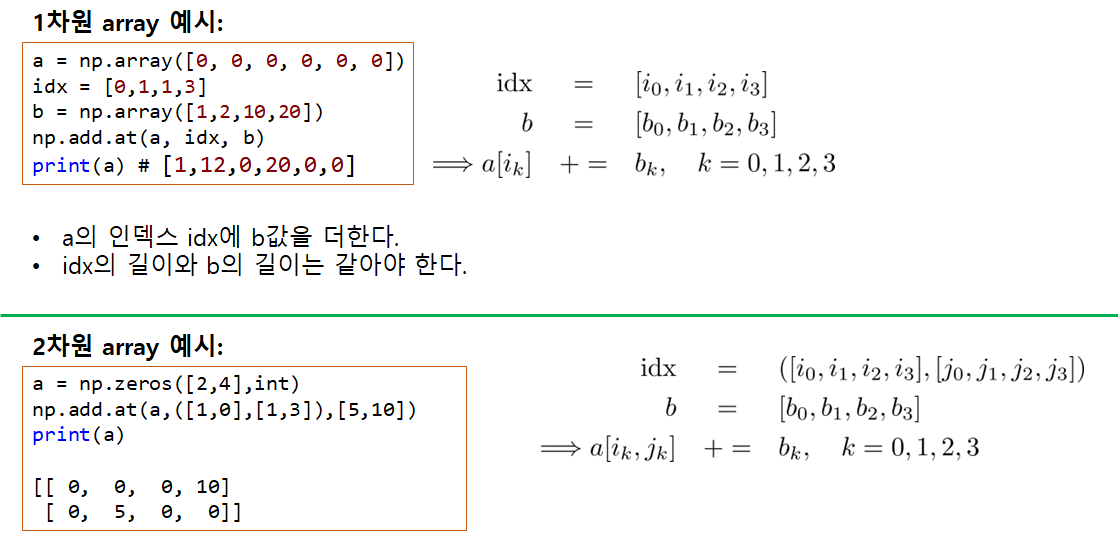

In [ ]:
a = np.array([0, 0, 0, 0, 0, 0])
idx = [0,1,1,3]
b = np.array([1,2,10,20])
np.add.at(a,idx,b)
a  # [ 1, 10,  0, 20,  0,  0]

array([ 1, 12,  0, 20,  0,  0])

In [ ]:
# np.add.at과 비교
a = np.array([0, 0, 0, 0, 0, 0])
idx = [0,1,1,3]
b = np.array([1,2,10,20])
a[idx] += b
a  # [ 1, 10,  0, 20,  0,  0]  <--- 중복 인덱스에 한번만 더해준다.

2-dim array
- ([1,0],[1,3])  --> a[1,1], a[0,3]에 값을 더해 준다.

In [ ]:
a = np.zeros([2,4],int)
np.add.at(a,([1,0],[1,3]),[5,10])
print(a)

[[ 0  0  0 10]
 [ 0  5  0  0]]


# 1.2 Tensorflow 기초

In [ ]:
import tensorflow as tf  # 2.9.2
import numpy as np

tf.__version__

'2.9.2'

## 1.2.1 tf.constant, tf.convert_to_tensor, tf.Variable

In [ ]:
a = np.array([[ 0.84, -0.15, -1.33],
              [ 0.11, -0.36,  0.08]])
X = tf.convert_to_tensor(a) # symbolic tensor를 넘길 수도 있다.

Y = tf.constant(a,shape=(6,)) # reshape도 가능.

V = tf.Variable(a) # V.trainable = True
V.assign_add(X)

Z = tf.convert_to_tensor(V) # symbolic tensor를 넘길 수도 있다.

print(f'X: {X}')
print(f'Y: {Y}')
print(f'V: {V}')
print(f'Z: {Z}')

X: [[ 0.84 -0.15 -1.33]
 [ 0.11 -0.36  0.08]]
Y: [ 0.84 -0.15 -1.33  0.11 -0.36  0.08]
V: <tf.Variable 'Variable:0' shape=(2, 3) dtype=float64, numpy=
array([[ 1.68, -0.3 , -2.66],
       [ 0.22, -0.72,  0.16]])>
Z: [[ 1.68 -0.3  -2.66]
 [ 0.22 -0.72  0.16]]


In [ ]:
type(V), type(V+X)

(tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.framework.ops.EagerTensor)

## 1.2.2 tf.gather, tf.gather_nd

In [ ]:
x = np.arange(12).reshape(4,3)
print(f'x: {x}\n')
print(tf.gather(x, indices=[3,0,2],axis=0))  # 행 추출
print(tf.gather(x, indices=[2,1], axis=1)) # 열 추출

x: [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

tf.Tensor(
[[ 9 10 11]
 [ 0  1  2]
 [ 6  7  8]], shape=(3, 3), dtype=int64)
tf.Tensor(
[[ 2  1]
 [ 5  4]
 [ 8  7]
 [11 10]], shape=(4, 2), dtype=int64)


In [ ]:
tf.gather(x,[2,2,0,1],axis=1) # tf.gather(x,idx,axis=1,batch_dims=0)과 동일

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[ 2,  2,  0,  1],
       [ 5,  5,  3,  4],
       [ 8,  8,  6,  7],
       [11, 11,  9, 10]])>

In [ ]:
X = np.array([[0.5267, 0.0362, 0.171,  0.2661],
                [0.0076,  0.0247, 0.8906, 0.0771],
                [0.265,   0.2017, 0.4556, 0.0777],
                [0.0972,  0.4766, 0.3375, 0.0887],
                [0.11,    0.2512, 0.2637, 0.3751]])
print('X: \n', x)
idx = np.array([0,2,2,1,3])
print('idx: ', idx)

print('='*20)
A = X[np.arange(len(X)),idx ]
print("Numpy: ", A)

assert len(idx) ==len(X)
B  = tf.gather(X,idx,axis=1,batch_dims=1) # [(0,0), (1,2), (2,2), (3,1), (4,3)] 원소를 추출한다.
print("TF(batch_dims=1): ", B)

idx2 = [0,2,2,1,3,1,2]
C  = tf.gather(X,idx2,axis=1,batch_dims=0)
print("TF(batch_dims=0): ", C)

X: 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
idx:  [0 2 2 1 3]
Numpy:  [0.5267 0.8906 0.4556 0.4766 0.3751]
TF(batch_dims=1):  tf.Tensor([0.5267 0.8906 0.4556 0.4766 0.3751], shape=(5,), dtype=float64)
TF(batch_dims=0):  tf.Tensor(
[[0.5267 0.171  0.171  0.0362 0.2661 0.0362 0.171 ]
 [0.0076 0.8906 0.8906 0.0247 0.0771 0.0247 0.8906]
 [0.265  0.4556 0.4556 0.2017 0.0777 0.2017 0.4556]
 [0.0972 0.3375 0.3375 0.4766 0.0887 0.4766 0.3375]
 [0.11   0.2637 0.2637 0.2512 0.3751 0.2512 0.2637]], shape=(5, 7), dtype=float64)


tf.gather_nd

In [ ]:
idx_ = list(zip(np.arange(len(idx)),idx)) # [(0, 0), (1, 2), (2, 2), (3, 1), (4, 3)]
print('idx: ', idx_)
tf.gather_nd(X,idx_)

idx:  [(0, 0), (1, 2), (2, 2), (3, 1), (4, 3)]


<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.5267, 0.8906, 0.4556, 0.4766, 0.3751])>

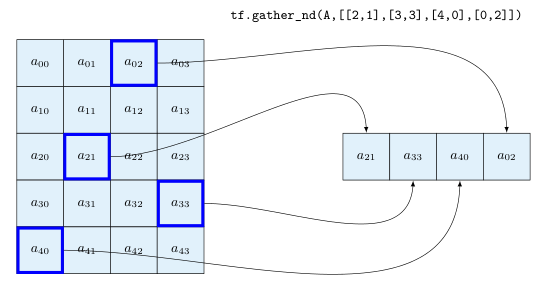

In [ ]:
A = np.arange(20).reshape(5,4)
print(A)
tf.gather_nd(A,[[2,1],[3,3],[4,0],[0,2]])



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 9, 15, 16,  2])>

## 1.2.4 Function vs Class API

In [ ]:
x = np.array([[-0.42451359, -0.5520304 , -0.39618764],
              [ 0.81954556,  0.07631097, -0.45242647]])

In [ ]:
tf.nn.relu(x)

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[0.        , 0.        , 0.        ],
       [0.81954556, 0.07631097, 0.        ]])>

In [ ]:
L = tf.keras.layers.ReLU()
L(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.        , 0.        , 0.        ],
       [0.81954557, 0.07631097, 0.        ]], dtype=float32)>

# 1.3 Pytorch 기초

In [ ]:
import torch
import numpy as np
torch.__version__  # 1.13.1+cu116

'2.0.1+cu118'

In [ ]:
torch.tensor([1,2]).dtype, torch.tensor([1.,2.]).dtype, torch.tensor(np.array([1.,2.])).dtype, torch.tensor(np.array([1.,2.]),dtype=torch.float).dtype

(torch.int64, torch.float32, torch.float64, torch.float32)

In [ ]:
torch.FloatTensor([1,2]).dtype, torch.FloatTensor([1.,2.]).dtype, torch.FloatTensor(np.array([1.,2.])).dtype, torch.FloatTensor(np.array([1.,2.])).dtype

(torch.float32, torch.float32, torch.float32, torch.float32)

device

In [ ]:
x = torch.randn(2,3,device='cpu')
if torch.cuda.is_available():
    y = x.to('cuda')
    print(x)
    print(y)

## 1.3.2 Numpy Tensorflow vs Pytorch
- Numpy와 Pytorch의 method 이름은 동일한 것이 많다.

In [ ]:
import numpy as np
import tensorflow as tf
import torch

In [ ]:
a = np.array([[ 1.85, -1.33, -0.95, -0.40, -0.58],
              [-0.17, -0.15,  0.52,  0.72 , 0.27]])
b = np.array([[ 1.38,  0.88,  0.72],
              [ 1.88, -0.18 , -0.57],
              [-0.28, -0.80,  0.22],
              [-1.78, -0.66, -2.46],
              [-0.86, -0.22, -1.87]])

a_ = torch.tensor(a)
b_ = torch.tensor(b)

sum

In [ ]:
print(a.sum()) # np.sum(a)
print(tf.reduce_sum(a)) # Tensorflow Tensor로 명시적으로 변경하지 않아도 된다.
print(a_.sum()) # torch.sum(a_)

-0.21999999999999997
tf.Tensor(-0.21999999999999975, shape=(), dtype=float64)
tensor(-0.2200, dtype=torch.float64)


mean

In [ ]:
print(a.mean()) # np.mean(a)
print(tf.reduce_mean(a)) # Tensorflow Tensor로 명시적으로 변경하지 않아도 된다.
print(a_.mean()) # torch.mean(a_)

-0.022
tf.Tensor(-0.021999999999999974, shape=(), dtype=float64)
tensor(-0.0220, dtype=torch.float64)


max

In [ ]:
print(a.max(axis=-1)) # np.max(a)
print(tf.reduce_max(a,axis=-1)) # Tensorflow Tensor로 명시적으로 변경하지 않아도 된다.
print(a_.max(axis=-1)) # torch.max(a_)
print('===')
print(a_.max()) # torch.max(a_,axis=-1)

[1.85 0.72]
tf.Tensor([1.85 0.72], shape=(2,), dtype=float64)
torch.return_types.max(
values=tensor([1.8500, 0.7200], dtype=torch.float64),
indices=tensor([0, 3]))
===
tensor(1.8500, dtype=torch.float64)


argmax

In [ ]:
print(a.argmax(axis=-1))
print(tf.argmax(a,axis=-1))
print(a_.argmax(axis=-1))  # torch.argmax(a_,axis=-1)

[0 3]
tf.Tensor([0 3], shape=(2,), dtype=int64)
tensor([0, 3])


In [ ]:
print(np.matmul(a,b))
print(tf.matmul(a,b))
print(torch.matmul(a_,b_))

[[ 1.5294  3.019   3.9497]
 [-2.176  -1.0732 -2.1986]]
tf.Tensor(
[[ 1.5294  3.019   3.9497]
 [-2.176  -1.0732 -2.1986]], shape=(2, 3), dtype=float64)
tensor([[ 1.5294,  3.0190,  3.9497],
        [-2.1760, -1.0732, -2.1986]], dtype=torch.float64)


In [ ]:
a_.max(axis=-1)

torch.return_types.max(
values=tensor([1.8500, 0.7200], dtype=torch.float64),
indices=tensor([0, 3]))

# 1.4 Pandas

- https://www.kaggle.com/competitions/titanic/data --> train.csv, test.csv 파일을 가져오자
- 책 1.5.1 참조

## 1.4.1 Tatanic 데이터셋

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# missing data 확인
test_df[test_df['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
# 수치 데이터에 대한 요약 정보
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


엑셀의 피봇 테이블(pivot table)처럼...

In [ ]:
pd.crosstab(train_df['Survived'], train_df['Sex']) # DataFrame

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
train_df[['Sex','Survived']].value_counts()  # Series

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

Code A

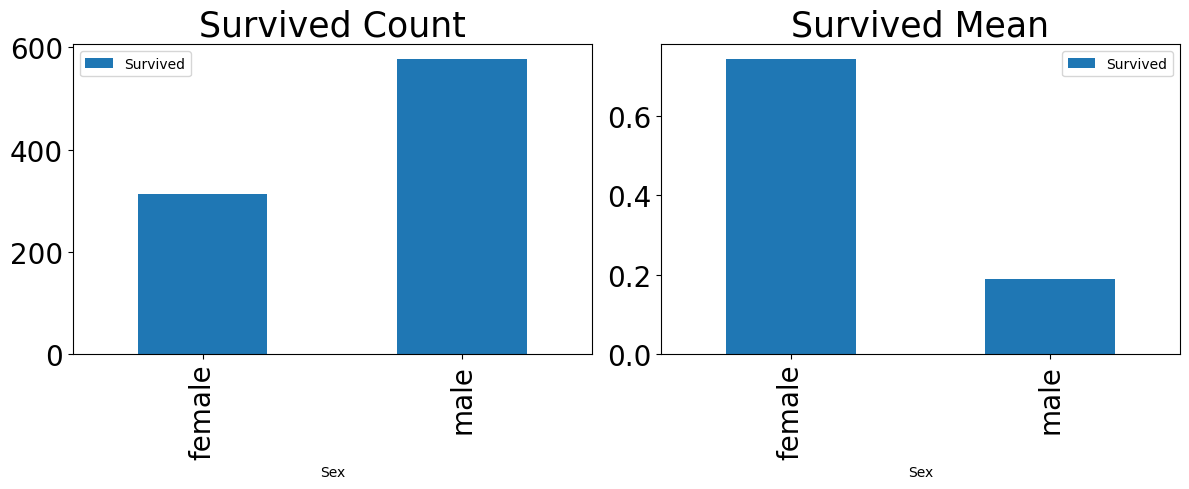

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,5))
train_df[['Sex','Survived']].groupby(['Sex']).count().plot.bar(ax=ax[0])
ax[0].set_title('Survived Count',fontsize=25)
ax[0].tick_params(labelsize=20)

train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Survived Mean',fontsize=25)
ax[1].tick_params(labelsize=20)

plt.tight_layout()
plt.savefig('survived_count_mean.png')
plt.show()

In [ ]:
print("dead:\n", train_df[train_df['Survived']==0]['Sex'].value_counts())
print('==========')
print("survived:\n", train_df[train_df['Survived']==1]['Sex'].value_counts())

dead:
 male      468
female     81
Name: Sex, dtype: int64
survived:
 female    233
male      109
Name: Sex, dtype: int64


Code B

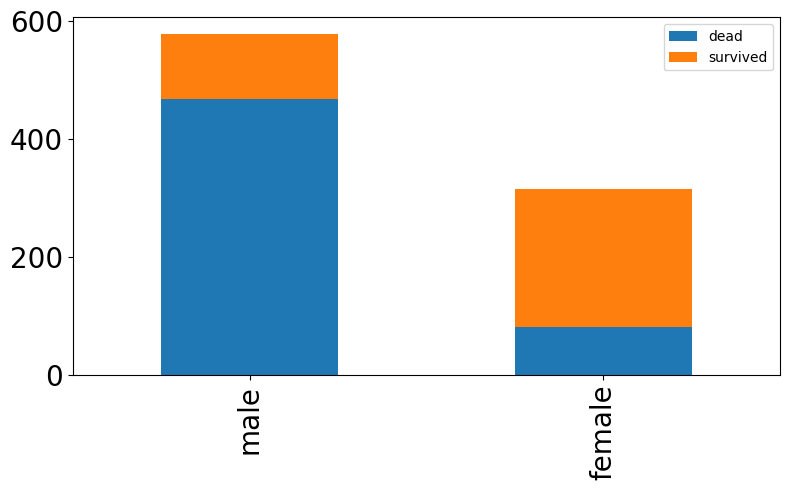

In [ ]:
male = train_df[train_df['Sex']=='male']['Survived'].value_counts()
female = train_df[train_df['Sex']=='female']['Survived'].value_counts()
df_survived = pd.DataFrame([male,female])
df_survived.index = ['male','female']
df_survived.plot(kind='bar',stacked=True, figsize=(8,5))
plt.legend(['dead', 'survived'])

plt.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('survived_sex.png')
plt.show()

### 데이터 살펴보기

In [ ]:
# 성별에 따른 생존율
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# Pclass(객실등급)에 따른 생존율
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass'>

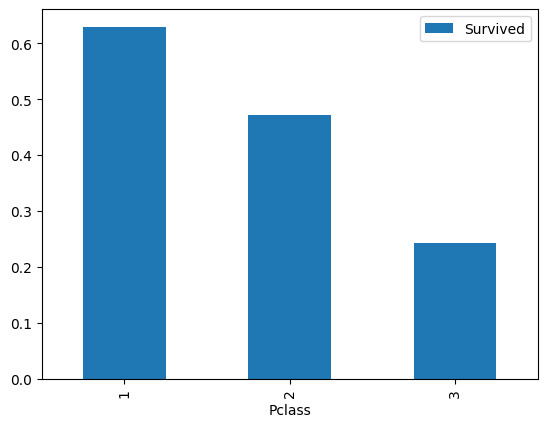

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

<Axes: xlabel='SibSp'>

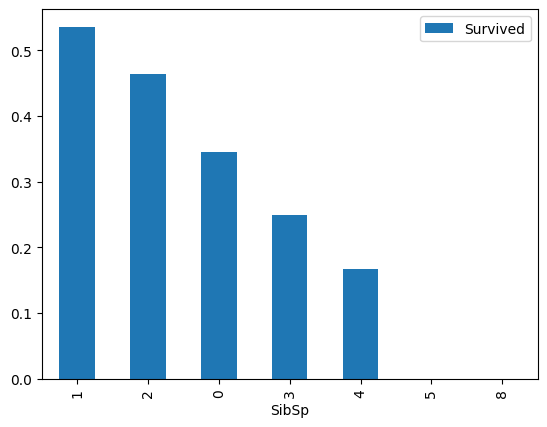

In [ ]:
# SibSp(가족 수)에 따른 생존율
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

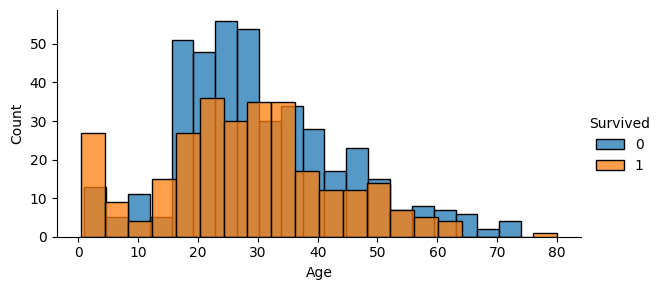

In [ ]:
# 생존/사망자의 나의 분포
g = sns.FacetGrid(train_df, hue='Survived',aspect=2)
g.map(sns.histplot, 'Age', bins=20)
g.add_legend()
plt.show()

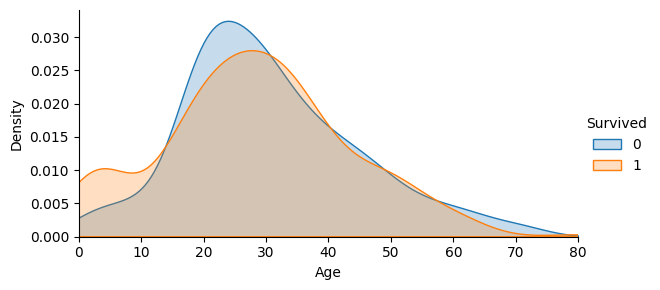

In [ ]:
# 생존/사망자의 나의 분포
g = sns.FacetGrid(train_df, hue="Survived",aspect=2)
g.map(sns.kdeplot,'Age',fill= True)
g.set(xlim=(0, train_df['Age'].max()))
g.add_legend()

plt.show()

### 새로운 feature('Title') 만들기
- 이름 중간에 포함된 Mr, Miss와 같은 title 추출
- 예: "Braund, Mr. Owen Harris"

In [ ]:
# dropna() --> n/a를 제외한 항목만.  명시적으로 dropna()를 하지 않아도 평균은 동일한 값으로 구해진다.
train_df['Age'].dropna().mean(), test_df['Age'].dropna().mean()

(29.69911764705882, 30.272590361445783)

In [ ]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.')

In [ ]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


{'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3}

In [ ]:
title_mapping = {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Don': 0, 'Rev': 0, 'Dr': 0, 'Mme': 1, 'Ms': 2, 'Major': 0, 'Lady': 1, 'Sir': 0, 'Mlle': 2, 'Col': 0, 'Capt': 0, 'Countess': 1, 'Jonkheer': 0}
train_df['Title'] = train_df['Title'].map(title_mapping)

train_df.loc[(train_df['Title']==0) & (train_df['Sex']=='female'),'Title'] = 1 # 강제 조정

In [ ]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
0,0,537
1,129,0
2,185,0
3,0,40


### N/A 처리
- fillna()를 이용하면 된다.
- Title별 평균값과 중앙값을 확인해보고, N/A를 중앙값으로 대체하자.

In [ ]:
print('평균 나이: ', train_df["Age"].mean())
print('Title별 평균값: \n', train_df.groupby('Title')['Age'].mean())
print('========')
print('Title별 중앙값: \n', train_df.groupby('Title')['Age'].median())

평균 나이:  29.69911764705882
Title별 평균값: 
 Title
0    32.984412
1    35.991071
2    21.845638
3     4.574167
Name: Age, dtype: float64
Title별 중앙값: 
 Title
0    30.0
1    35.0
2    21.0
3     3.5
Name: Age, dtype: float64


In [ ]:
train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform('median'), inplace=True)
#train_df['Age'] = train_df.groupby('Title').Age.transform(lambda x: x.fillna(x.median())) # 이렇게 처리할 수도 있다.

# Embarked 결측치 처리 후, 변환
train_df['Embarked'] = train_df['Embarked'].fillna('S')

# Fare 결측치 처리: Pclass 중앙값으로 대체
train_df['Fare'].fillna(train_df.groupby('Pclass')['Fare'].transform('median'), inplace=True)

# 가족 수 합치기
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# 불필요한 자료 제거
train_df.drop( ['Name','Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1, inplace=True)

# Categorical Data --> one-hot encoding
train_df = pd.get_dummies(train_df,columns=['Sex','Pclass','Embarked', 'Title'])

train_df.head(10)

,PassengerId,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_0,Title_1,Title_2,Title_3
0,1,0,22.0,7.2500,2,0,1,0,0,1,0,0,1,1,0,0,0
1,2,1,38.0,71.2833,2,1,0,1,0,0,1,0,0,0,1,0,0
2,3,1,26.0,7.9250,1,1,0,0,0,1,0,0,1,0,0,1,0
3,4,1,35.0,53.1000,2,1,0,1,0,0,0,0,1,0,1,0,0
4,5,0,35.0,8.0500,1,0,1,0,0,1,0,0,1,1,0,0,0
5,6,0,30.0,8.4583,1,0,1,0,0,1,0,1,0,1,0,0,0
6,7,0,54.0,51.8625,1,0,1,1,0,0,0,0,1,1,0,0,0
7,8,0,2.0,21.0750,5,0,1,0,0,1,0,0,1,0,0,0,1
8,9,1,27.0,11.1333,3,1,0,0,0,1,0,0,1,0,1,0,0
9,10,1,14.0,30.0708,2,1,0,0,1,0,1,0,0,0,1,0,0


one-hot encoding 변환

In [ ]:
df =  pd.DataFrame({'Title': ['A','B','B','C','A']})  # 가상 데이터 생성
print(df)
pd.get_dummies(df,columns=['Title']) # one-hot encoding 변환

  Title
0     A
1     B
2     B
3     C
4     A


,Title_A,Title_B,Title_C
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0


## 1.4.2 titanic 데이터 배치 처리

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

title_mapping = {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Don': 0, 'Rev': 0, 'Dr': 0, 'Mme': 1, 'Ms': 2, 'Major': 0, 'Lady': 1, 'Sir': 0, 'Mlle': 2, 'Col': 0, 'Capt': 0, 'Countess': 1, 'Jonkheer': 0}

for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')

    # Title 처리
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset.loc[(dataset['Title']==0) & (dataset['Sex']=='female'),'Title'] = 1

    # Age Missing Data 처리
    dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)

    # Embarked Missing을 가장 많은 S로
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

    # Fare Missing을 Pclass 중앙값으로
    dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)

    # 가족 data합치기
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

    # 불필요한 자료 제거
    dataset.drop( ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)


#Categorical Data --> one-hot encoding
train_df = pd.get_dummies(train_df,columns=['Sex','Pclass','Embarked', 'Title'])  # 4개 column 각각을 변환
test_df = pd.get_dummies(test_df,columns=['Sex','Pclass','Embarked', 'Title'])

train_input = train_df.drop(['PassengerId','Survived'], axis=1).values
train_target = train_df['Survived'].values.reshape(-1,1)

test_input = test_df.drop(['PassengerId'], axis=1).values

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   FamilySize   891 non-null    int64  
 5   Sex_female   891 non-null    uint8  
 6   Sex_male     891 non-null    uint8  
 7   Pclass_1     891 non-null    uint8  
 8   Pclass_2     891 non-null    uint8  
 9   Pclass_3     891 non-null    uint8  
 10  Embarked_C   891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
 13  Title_0      891 non-null    uint8  
 14  Title_1      891 non-null    uint8  
 15  Title_2      891 non-null    uint8  
 16  Title_3      891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(12)
memory usage: 45.4 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   Fare         418 non-null    float64
 3   FamilySize   418 non-null    int64  
 4   Sex_female   418 non-null    uint8  
 5   Sex_male     418 non-null    uint8  
 6   Pclass_1     418 non-null    uint8  
 7   Pclass_2     418 non-null    uint8  
 8   Pclass_3     418 non-null    uint8  
 9   Embarked_C   418 non-null    uint8  
 10  Embarked_Q   418 non-null    uint8  
 11  Embarked_S   418 non-null    uint8  
 12  Title_0.0    418 non-null    uint8  
 13  Title_1.0    418 non-null    uint8  
 14  Title_2.0    418 non-null    uint8  
 15  Title_3.0    418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(12)
memory usage: 18.1 KB


In [ ]:
train_df.head(10)

,PassengerId,Survived,Age,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_0,Title_1,Title_2,Title_3
0,1,0,22.0,7.2500,2,0,1,0,0,1,0,0,1,1,0,0,0
1,2,1,38.0,71.2833,2,1,0,1,0,0,1,0,0,0,1,0,0
2,3,1,26.0,7.9250,1,1,0,0,0,1,0,0,1,0,0,1,0
3,4,1,35.0,53.1000,2,1,0,1,0,0,0,0,1,0,1,0,0
4,5,0,35.0,8.0500,1,0,1,0,0,1,0,0,1,1,0,0,0
5,6,0,30.0,8.4583,1,0,1,0,0,1,0,1,0,1,0,0,0
6,7,0,54.0,51.8625,1,0,1,1,0,0,0,0,1,1,0,0,0
7,8,0,2.0,21.0750,5,0,1,0,0,1,0,0,1,0,0,0,1
8,9,1,27.0,11.1333,3,1,0,0,0,1,0,0,1,0,1,0,0
9,10,1,14.0,30.0708,2,1,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
train_input.shape, train_target.shape, test_input.shape

((891, 15), (891, 1), (418, 15))

# 1.5 Google Colaboratory에서 실습 환경 구축

## 1.5.2 matplotblib 한글 사용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작해야 함.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rc('font',family='NanumBarunGothic')
plt.rc('font',family=['NanumGothic','sans-serif']) # plt.rcParams['font.family'] = ['NanumGothic','sans-serif']
plt.rc('axes', unicode_minus=False)  # plt.rcParams['axes.unicode_minus'] = False

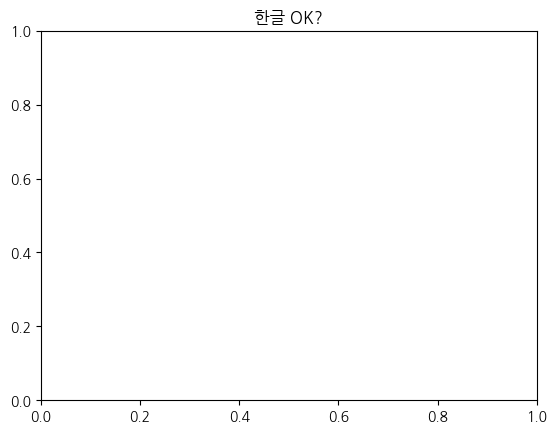

In [ ]:
plt.title('한글 OK?')
plt.show()

## 1.5.3 Mecab, konlpy 설치

In [ ]:
!set -x
!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x &>-
!pip install mecab-python3 -qq
!pip install konlpy -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 43.0 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Mecab
mecab=Mecab()
mecab.morphs('학생들이 점심을 먹고 있다.') # ['학생', '들', '이', '점심', '을', '먹', '고', '있', '다', '.']

['학생', '들', '이', '점심', '을', '먹', '고', '있', '다', '.']

## 1.5.4 Google Colaboratory - Google Drive 연결

In [ ]:
from google.colab import drive
drive.mount('/content/my_drive') # '/content/dir_name'

Mounted at /content/my_drive


## 1.5.5 코드 재현성(reproducibility)을 위한 시드 고정

Tensorflow seed 고정

In [ ]:
import tensorflow as tf

seed = 100
tf.keras.utils.set_random_seed(seed)  # python, numpy, tensorflow seed 고정
tf.config.experimental.enable_op_determinism() # 속도 저하

Pytorch seed 고정

In [ ]:
import torch
import numpy

def torch_reset_seed(seed=100):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True  # 속도 저하
        torch.backends.cudnn.benchmark = False     # 속도 저하

In [ ]:
seed = 100
np.random.seed(seed)
torch_reset_seed(seed)